In [ ]:
%pip install scikit-learn
%pip install seaborn
%pip install scipy
%pip install db-dtypes
%pip install -U scikit-learn
%pip install openpyxl
%pip install matplotlib

In [4]:
#importamos todas las librerías necesarias
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import sys
import shutil

from dotenv import load_dotenv
from datetime import date, timedelta
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.ensemble import IsolationForest

In [5]:
src_path = os.path.join(os.path.dirname(os.getcwd()), 'src/ci-345_controles-valores-de-unidad-de-fondo')
sys.path.append(src_path)

from data.make_dataset import modify_data, bq_consulta
from data.analytics import historic, rename, analisis, prueba_shapiro
from utils.sql import sql_text

/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/venv/lib/python3.7/site-packages/google/auth/__init__.py:55: Python37DeprecationWarning: After January 1, 2024, new releases of this library will drop support for Python 3.7. More details about Python 3.7 support can be found at https://cloud.google.com/python/docs/python37-sunset/
  warnings.warn(message, Python37DeprecationWarning)
/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/venv/lib/python3.7/site-packages/google/oauth2/__init__.py:40: Python37DeprecationWarning: After January 1, 2024, new releases of this library will drop support for Python 3.7. More details about Python 3.7 support can be found at https://cloud.google.com/python/docs/python37-sunset/
  warnings.warn(message, Python37DeprecationWarning)


In [6]:
dfrme = bq_consulta(sql_text)

/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/venv/lib/python3.7/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/venv/lib/python3.7/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [7]:
dfrme['FECHA_VALORACION'] = pd.to_datetime(dfrme['FECHA_VALORACION'], dayfirst=True)

In [8]:
dfrme = dfrme[dfrme['NEMOTECNICO'] != '']

In [9]:
df_encoded = pd.get_dummies(dfrme, columns=['CLASE_INVERSION', ])

In [10]:
df_encoded['PAGO'] = df_encoded['INTERESES'].apply(lambda x: 1 if x > 0 else 0)

In [11]:
df_encoded['FECHA_VALORACION'].min()

Timestamp('2017-11-16 00:00:00')

In [ ]:
with open(f'data.pkl', 'wb') as data:
        pickle.dump(df_encoded, data)

In [12]:
X = df_encoded.drop(columns = ['FECHA_ANTERIOR','MAX_DATE'])

In [13]:
X ['dias'] = (X['FECHA_VALORACION'] - X['FECHA_VALORACION'].min()).dt.days

In [14]:
X = X.drop(columns=['FECHA_VALORACION'])

In [15]:
X['dias'].max()

2244

In [16]:
X = X.replace(np.nan, 0)

In [17]:
X

INTERESES  VALOR_NOMINAL_OP    PRECIO  ANTERIOR    CAMBIO  \
0             0.0               0.0   100.206    99.996  0.002100   
1             0.0               0.0   100.241   100.206  0.000349   
2             0.0               0.0   100.291   100.241  0.000499   
3             0.0               0.0   100.341   100.291  0.000499   
4             0.0               0.0   100.495   100.341  0.001535   
...           ...               ...       ...       ...       ...   
703950        0.0               0.0  5101.270  5101.270  0.000000   
703951        0.0               0.0  5101.270  5101.270  0.000000   
703952        0.0               0.0  4800.150  5101.270 -0.059028   
703953        0.0               0.0  4800.150  4800.150  0.000000   
703954        0.0               0.0  4800.150  4800.150  0.000000   

        NEMOTECNICO  CLASE_INVERSION_AAENVS  CLASE_INVERSION_AAEVS  \
0       : CDTBTG80P                       0                      0   
1       : CDTBTG80P                       0                      0   
2       : CDTBTG80P                       0                      0   
3       : CDTBTG80P                       0                      0   
4       : CDTBTG80P                       0                      0   
...             ...                     ...                    ...   
703950       VILLAS                       0                      0   
703951       VILLAS                       0                      0   
703952       VILLAS                       0                      0   
703953       VILLAS                       0                      0   
703954       VILLAS                       0                      0   

        CLASE_INVERSION_ABENVS  CLASE_INVERSION_ABEVS  ...  \
0                            0                      0  ...   
1                            0                      0  ...   
2                            0                      0  ...   
3                            0                      0  ...   
4                            0                      0  ...   
...                        ...                    ...  ...   
703950                       0                      1  ...   
703951                       0                      1  ...   
703952                       0                      1  ...   
703953                       0                      1  ...   
703954                       0                      1  ...   

        CLASE_INVERSION_TCCTIN  CLASE_INVERSION_TDPIT  CLASE_INVERSION_TIDIS  \
0                            0                      0                      0   
1                            0                      0                      0   
2                            0                      0                      0   
3                            0                      0                      0   
4                            0                      0                      0   
...                        ...                    ...                    ...   
703950                       0                      0                      0   
703951                       0                      0                      0   
703952                       0                      0                      0   
703953                       0                      0                      0   
703954                       0                      0                      0   

        CLASE_INVERSION_TPENVS  CLASE_INVERSION_TPMTIN  CLASE_INVERSION_TSEGE  \
0                            0                       0                      0   
1                            0                       0                      0   
2                            0                       0                      0   
3                            0                       0                      0   
4                            0                       0                      0   
...                        ...                     ...                    ...   
703950                       0                       0           

In [18]:
X_t = X[X['dias'] <= 2188]

In [19]:
Y = X[X['dias'] > 2188]

In [20]:
original_data = {}
by_nemo = X_t.groupby('NEMOTECNICO')

for groups, data in by_nemo:
    original_data[groups] = data

In [21]:
proof = {}
by_nemo = Y.groupby('NEMOTECNICO')

for groups, data in by_nemo:
    proof[groups] = data

In [22]:
original_data

{': CDTBTG80P':      INTERESES  VALOR_NOMINAL_OP   PRECIO  ANTERIOR    CAMBIO  NEMOTECNICO  \
 0          0.0               0.0  100.206    99.996  0.002100  : CDTBTG80P   
 1          0.0               0.0  100.241   100.206  0.000349  : CDTBTG80P   
 2          0.0               0.0  100.291   100.241  0.000499  : CDTBTG80P   
 3          0.0               0.0  100.341   100.291  0.000499  : CDTBTG80P   
 4          0.0               0.0  100.495   100.341  0.001535  : CDTBTG80P   
 ..         ...               ...      ...       ...       ...          ...   
 140        0.0               0.0  102.154   102.117  0.000362  : CDTBTG80P   
 141        0.0               0.0  102.192   102.154  0.000372  : CDTBTG80P   
 142        0.0               0.0  102.233   102.192  0.000401  : CDTBTG80P   
 143        0.0               0.0  102.274   102.233  0.000401  : CDTBTG80P   
 144        0.0               0.0  102.304   102.274  0.000293  : CDTBTG80P   
 
      CLASE_INVERSION_AAENVS  CLASE

In [23]:
for i in original_data:
    od = original_data[i].drop(columns=['NEMOTECNICO','INTERESES','VALOR_NOMINAL_OP','PRECIO','ANTERIOR'])
    original_data[i] = od

In [24]:
for i in proof:
    od = proof[i].drop(columns=['NEMOTECNICO','INTERESES','VALOR_NOMINAL_OP','PRECIO','ANTERIOR'])
    proof[i] = od

In [25]:
original_data['BBTA7197O029'].sort_values(by='dias')

CAMBIO  CLASE_INVERSION_AAENVS  CLASE_INVERSION_AAEVS  \
79857  0.000100                       0                      0   
79858  0.000100                       0                      0   
79859  0.000838                       0                      0   
79860 -0.000528                       0                      0   
79861  0.000568                       0                      0   
...         ...                     ...                    ...   
81332 -0.013014                       0                      0   
81333  0.000064                       0                      0   
81334  0.000142                       0                      0   
81335  0.000129                       0                      0   
81336  0.000142                       0                      0   

       CLASE_INVERSION_ABENVS  CLASE_INVERSION_ABEVS  CLASE_INVERSION_AEE  \
79857                       0                      0                    0   
79858                       0                      0                    0   
79859                       0                      0                    0   
79860                       0                      0                    0   
79861                       0                      0                    0   
...                       ...                    ...                  ...   
81332                       0                      0                    0   
81333                       0                      0                    0   
81334                       0                      0                    0   
81335                       0                      0                    0   
81336                       0                      0                    0   

       CLASE_INVERSION_AMENVS  CLASE_INVERSION_AMEVS  CLASE_INVERSION_BHIP  \
79857                       0                      0                     0   
79858                       0                      0                     0   
79859                       0                      0                     0   
79860                       0                      0                     0   
79861                       0                      0                     0   
...                       ...                    ...                   ...   
81332                       0                      0                     0   
81333                       0                      0                     0   
81334                       0                      0                     0   
81335                       0                      0                     0   
81336                       0                      0                     0   

       CLASE_INVERSION_BOEEDB  ...  CLASE_INVERSION_TCCTIN  \
79857                       0  ...                       0   
79858                       0  ...                       0   
79859                       0  ...                       0   
79860                       0  ...                       0   
79861                       0  ...                       0   
...                       ...  ...                     ...   
81332                       0  ...                       0   
81333                       0  ...                       0   
81334                       0  ...                       0   
81335                       0  ...                       0   
81336                       0  ...                       0   

       CLASE_INVERSION_TDPIT  CLASE_INVERSION_TIDIS  CLASE_INVERSION_TPENVS  \
79857                      1                      0                       0   
79858                      1                      0                       0   
79859                      1                      0                       0   
79860                      1                      0                       0   
79861                      1                      0                       0   
...                      ...                    ...                     ...   
81332                      1                      0     

In [26]:
proof['BBTA7197O029'].sort_values(by='dias')

CAMBIO  CLASE_INVERSION_AAENVS  CLASE_INVERSION_AAEVS  \
81337  0.030413                       0                      0   
81338  0.006033                       0                      0   
81339  0.000807                       0                      0   
81340 -0.008287                       0                      0   
81341  0.000138                       0                      0   
81342  0.000138                       0                      0   
81343 -0.001063                       0                      0   
81344  0.019968                       0                      0   
81345 -0.001497                       0                      0   
81346 -0.005667                       0                      0   
81347 -0.003177                       0                      0   
81348  0.000136                       0                      0   
81349  0.000124                       0                      0   
81350  0.001748                       0                      0   
81351 -0.002079                       0                      0   
81352  0.007442                       0                      0   
81353 -0.009406                       0                      0   
81354 -0.002473                       0                      0   
81355  0.000137                       0                      0   
81356  0.000125                       0                      0   
81357 -0.007162                       0                      0   
81358 -0.000703                       0                      0   
81359  0.004394                       0                      0   
81360 -0.011700                       0                      0   
81361  0.000139                       0                      0   
81362  0.000139                       0                      0   
81363  0.000126                       0                      0   
81364 -0.006802                       0                      0   
81365  0.003475                       0                      0   
81366  0.019382                       0                      0   
81367  0.024178                       0                      0   
81368  0.003293                       0                      0   
81369  0.000133                       0                      0   
81370  0.000133                       0                      0   
81371  0.004952                       0                      0   
81372  0.019685                       0                      0   
81373  0.012169                       0                      0   
81374  0.012618                       0                      0   
81375  0.012680                       0                      0   
81376  0.000114                       0                      0   
81377  0.000114                       0                      0   
81378  0.000125                       0                      0   
81379 -0.011197                       0                      0   
81380 -0.001703                       0                      0   
81381 -0.005741                       0                      0   
81382  0.000128                       0                      0   
81383  0.000116                       0                      0   
81384  0.000128                       0                      0   
81385  0.000127                       0                      0   
81386 -0.007219                       0                      0   
81387 -0.007108                       0                      0   
81388 -0.008746                       0                      0   
81389  0.007341                       0                      0   
81390  0.000118                       0                      0   
81391  0.000141                       0                      0   
81392  0.000118                       0                      0   

       CLASE_INVERSION_ABENVS  CLASE_INVERSION_ABEVS  CLASE_INVERSION_AEE  \
81337                       0                      0                    0   
81338                       0                      0                    0   
81339          

In [27]:
def contaminacion(dataframe):
    # Extraer la serie temporal o valores relevantes
    serie_temporal = dataframe['CAMBIO'].values

    # Calcular el percentil umbral
    umbral = np.percentile(serie_temporal, 90)

    # Contar valores que superan el umbral
    outliers = serie_temporal[serie_temporal > umbral]

    # Calcular la contaminación estimada
    contaminacion = len(outliers) / len(serie_temporal)

    return contaminacion

In [28]:
c = contaminacion(original_data['BBTA7197O029'])

In [29]:
modelo_deteccion = IsolationForest(n_estimators=100,max_samples='auto',contamination=c,random_state=42)
modelo_deteccion.fit(original_data['BBTA7197O029'].to_numpy())
    

IsolationForest(contamination=0.1, random_state=42)

In [30]:
modelo_salida = modelo_deteccion.predict(original_data['BBTA7197O029'].to_numpy())

In [31]:
modelo_salida = modelo_deteccion.predict(proof['BBTA7197O029'].to_numpy())

In [32]:
result_df = pd.DataFrame({'dias':proof['BBTA7197O029']['dias'],'CAMBIO': proof['BBTA7197O029']['CAMBIO'],'ABONO':Y[Y['NEMOTECNICO']=='BBTA7197O029']['PAGO'], 'outliers': [1 if x == 1 else -1 for x in modelo_salida]})

In [33]:
result_df['FECHA_VALORACION'] = pd.to_datetime('2017-11-16') + pd.to_timedelta(result_df['dias'], unit='D')

In [34]:
result_df = result_df.set_index('FECHA_VALORACION').reset_index()
result_df.drop(columns = 'dias').sort_values(by='CAMBIO')

FECHA_VALORACION    CAMBIO  ABONO  outliers
23       2023-12-07 -0.011700      0        -1
42       2023-12-26 -0.011197      0        -1
16       2023-11-30 -0.009406      0        -1
51       2024-01-04 -0.008746      0        -1
3        2023-11-17 -0.008287      0        -1
49       2024-01-02 -0.007219      0        -1
20       2023-12-04 -0.007162      0        -1
50       2024-01-03 -0.007108      0        -1
27       2023-12-11 -0.006802      0        -1
44       2023-12-28 -0.005741      0        -1
9        2023-11-23 -0.005667      0        -1
10       2023-11-24 -0.003177      0        -1
17       2023-12-01 -0.002473      0        -1
14       2023-11-28 -0.002079      0         1
43       2023-12-27 -0.001703      0         1
8        2023-11-22 -0.001497      0         1
6        2023-11-20 -0.001063      0         1
21       2023-12-05 -0.000703      0         1
40       2023-12-24  0.000114      0         1
39       2023-12-23  0.000114      0         1
46       2023-12-30  0.000116      0         1
55       2024-01-08  0.000118      0         1
53       2024-01-06  0.000118      0         1
12       2023-11-26  0.000124      0         1
19       2023-12-03  0.000125      0         1
41       2023-12-25  0.000125      0         1
26       2023-12-10  0.000126      0         1
48       2024-01-01  0.000127      0         1
47       2023-12-31  0.000128      0         1
45       2023-12-29  0.000128      0         1
33       2023-12-17  0.000133      0         1
32       2023-12-16  0.000133      0         1
11       2023-11-25  0.000136      0         1
18       2023-12-02  0.000137      0         1
5        2023-11-19  0.000138      0         1
4        2023-11-18  0.000138      0         1
25       2023-12-09  0.000139      0         1
24       2023-12-08  0.000139      0         1
54       2024-01-07  0.000141      0         1
2        2023-11-16  0.000807      0         1
13       2023-11-27  0.001748      0         1
31       2023-12-15  0.003293      0        -1
28       2023-12-12  0.003475      0        -1
22       2023-12-06  0.004394      0        -1
34       2023-12-18  0.004952      0        -1
1        2023-11-15  0.006033      0        -1
52       2024-01-05  0.007341      0        -1
15       2023-11-29  0.007442      0        -1
36       2023-12-20  0.012169      0        -1
37       2023-12-21  0.012618      0        -1
38       2023-12-22  0.012680      0        -1
29       2023-12-13  0.019382      0        -1
35       2023-12-19  0.019685      0        -1
7        2023-11-21  0.019968      0        -1
30       2023-12-14  0.024178      0        -1
0        2023-11-14  0.030413      0        -1

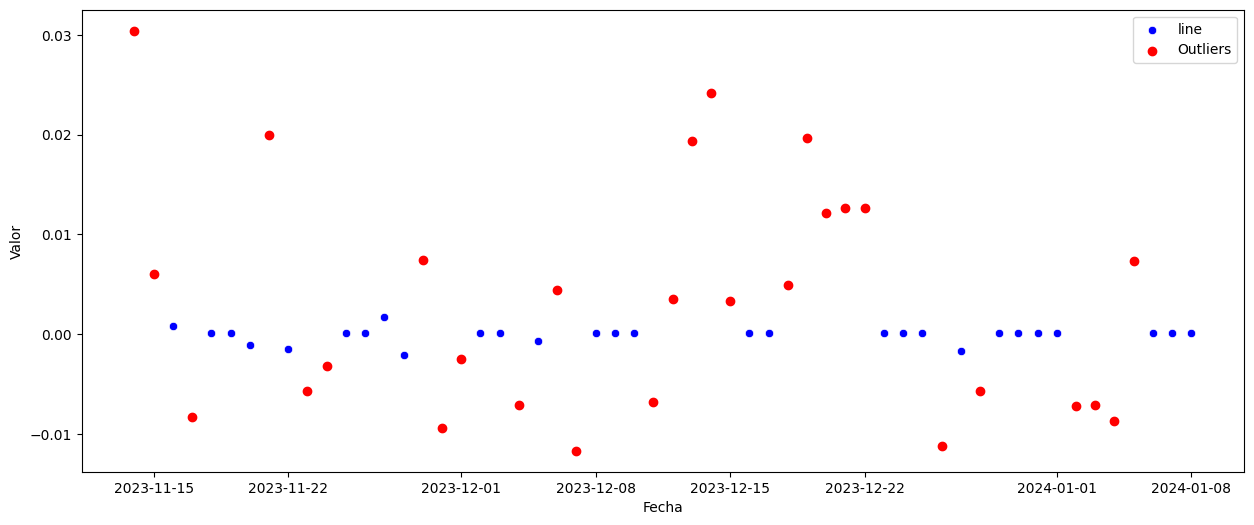

In [35]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='FECHA_VALORACION', y='CAMBIO', color='b',data= result_df,label='line')
outliers = result_df[result_df['outliers'] == -1]
plt.scatter(x=outliers['FECHA_VALORACION'], y=outliers['CAMBIO'], color='red', label='Outliers')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()

# Mostrar el gráfico
plt.show()

In [36]:
cont = []
for i in original_data:
    try:
        dt=original_data[i]
        if round(contaminacion(dt),2) < 0.16 and round(contaminacion(dt),2) > 0.09 :
            cont.append([i,0.1])
        else:
            cont.append([i,contaminacion(dt)])
    except ValueError:
        pass

In [37]:
modelos = {}

In [68]:
def modelo(modelo,dt):
    modelo_entrenado = modelo.fit(dt.to_numpy())
    modelo_salida = modelo_entrenado.predict(dt.to_numpy())
    return modelo_entrenado,modelo_salida, dt

In [69]:
def train_predict_historico(original_data,contaminacion):
    dt = original_data
    try:
        modelo_deteccion = IsolationForest(n_estimators=100,max_samples='auto',contamination=contaminacion,random_state=42)
        modelo_entrenado, modelo_salida,dt = modelo(modelo_deteccion,dt)
    except ValueError:
        modelo_deteccion = IsolationForest(n_estimators=100,max_samples='auto',contamination=0.1,random_state=42)
        modelo_entrenado, modelo_salida,dt = modelo(modelo_deteccion,dt)
    return dt,modelo_salida, modelo_entrenado
    

In [70]:
def resultados_historico(original_data,contaminacion,nemo):
    dt, modelo_salida, modelo_entrenado = train_predict_historico(original_data,contaminacion)  
    result_df = pd.DataFrame({'dias':dt['dias'],'CAMBIO': dt['CAMBIO'], 'outliers': [1 if x == 1 else -1 for x in modelo_salida],'PAGO':dt['PAGO']})
    result_df['FECHA_VALORACION'] = pd.to_datetime('2017-11-16') + pd.to_timedelta(result_df['dias'], unit='D')
    result_df = result_df.set_index('FECHA_VALORACION').reset_index()
    result_df.drop(columns = 'dias').sort_values(by='CAMBIO')
    with open(f'modelo_{nemo}.pkl', 'wb') as modelo_guardado:
      pickle.dump(modelo_entrenado, modelo_guardado)
    print(f"se generan las alertas para {nemo}, {result_df}, {type(result_df)}")

In [71]:
count = 0
for i in cont:
    count += 1
    resultados_historico(original_data[i[0]],i[1],i[0])

se generan las alertas para : CDTBTG80P,     FECHA_VALORACION  dias    CAMBIO  outliers  PAGO
0         2023-02-02  1904  0.002100        -1     0
1         2023-02-03  1905  0.000349         1     0
2         2023-02-04  1906  0.000499         1     0
3         2023-02-05  1907  0.000499         1     0
4         2023-02-06  1908  0.001535        -1     0
..               ...   ...       ...       ...   ...
140       2023-06-22  2044  0.000362         1     0
141       2023-06-23  2045  0.000372         1     0
142       2023-06-24  2046  0.000401         1     0
143       2023-06-25  2047  0.000401         1     0
144       2023-06-26  2048  0.000293        -1     0

[145 rows x 5 columns], <class 'pandas.core.frame.DataFrame'>
se generan las alertas para BALP1091A15,      FECHA_VALORACION  dias    CAMBIO  outliers  PAGO
0          2017-11-17     1 -0.000443        -1     0
1          2017-11-18     2  0.000272         1     0
2          2017-11-19     3  0.000271         1     0
3  

In [ ]:
contador = 0
for i in cont:
    contador+= 1
    shutil.move(os.path.join('/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/notebooks', f'modelo_{i[0]}.pkl'), os.path.join('/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/notebooks/modelos', f'modelo_{i[0]}.pkl'))
    

In [74]:
contador

622

In [73]:
contador = 0
for i in cont:
    contador+= 1
    shutil.move(os.path.join('/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/notebooks/modelos', f'modelo_{i[0]}.pkl'), os.path.join('/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/src/ci-345_controles-valores-de-unidad-de-fondo/modelos/modelos_entrenados',f'modelo_{i[0]}.pkl'))
    